In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline


def my_forward_diff(function,h):
    #建立建立一個function_2 list
    function_forward=[]
    #將forward_diff的結果存入list
    for i in range(np.size(function)-1):
         function_forward.append((function[i+1]-function[i])/h)
    
    return function_forward


def my_num_diff_w_smoothing(x, y, n):
        y_smooth = []
        for i in range(4,len(y)-4):
            #store_T=np.mean(y[i-n:i+n])
            y_smooth.append( np.mean(y[i-n:i+n]))
        X=x[4:96]
        dy=central_diff(y_smooth)
       
        X=X[1:-1]
  
        return [dy,X]
  
 
        
def central_diff(f):
    
    midpoint = []
    h = 2*np.pi/(100-1)
    for i in range(1,len(f)-1):
        E = (f[i+1] - f[i-1])/(2*h)
        midpoint.append(E)
    return midpoint

In [38]:
np.random.seed(42)
h = 2*np.pi/(100-1)
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) + np.random.randn(len(x))/100
cosine = np.cos(x)
x_diff = x[1:100] 
unsmooth_forward=my_forward_diff(y,h)
[dy, X] = my_num_diff_w_smoothing(x, y, 4)

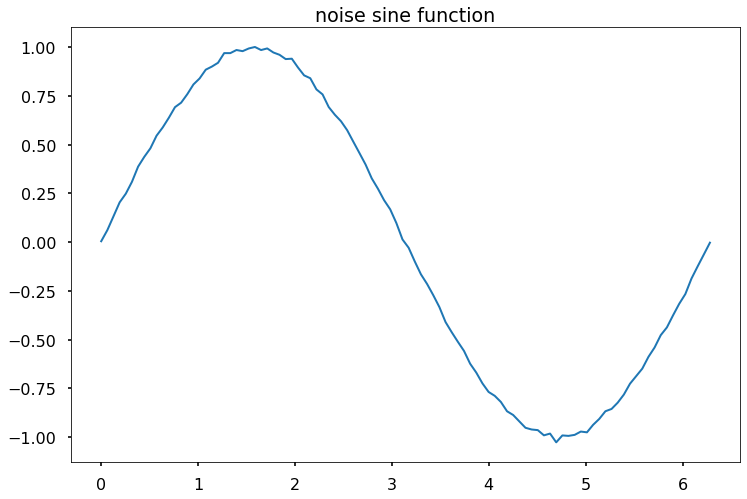

In [39]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, linewidth = "2" )
plt.title("noise sine function")
plt.show()

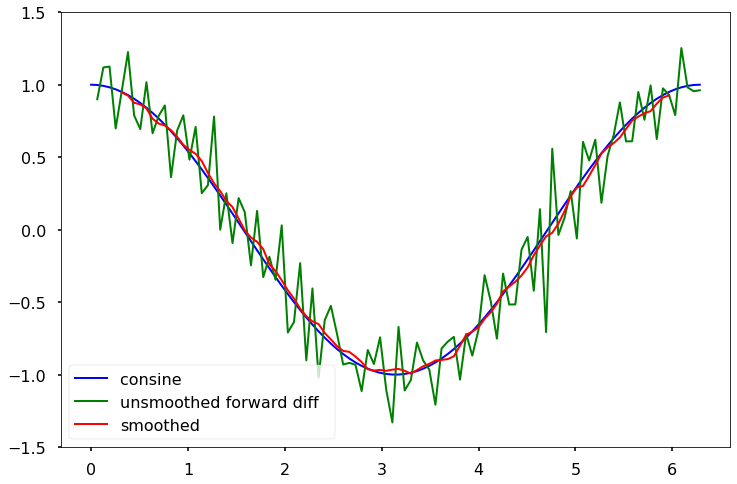

In [40]:
plt.figure(figsize = (12, 8))
plt.plot(x,cosine,linewidth = "2",\
label = "consine ",color='blue')
plt.plot(x_diff,unsmooth_forward,linewidth="2",\
label = "unsmoothed forward diff  ",color='green')
plt.plot(X,dy,linewidth = "2",\
label = "smoothed", color = 'red')
plt.ylim(-1.5,1.5)
plt.legend(loc = 'lower left')
plt.show()